In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import cv2 as cv
# from scipy.ndimage.filters import sobel
from scipy.ndimage import sobel

import pathlib
from dotenv import load_dotenv

from ipywidgets import interact, widgets
from plotly.express import imshow as imshow_interactive
from tqdm.notebook import tqdm

In [5]:
from template_match import read_image_rgb, read_image_gray, template_match, detect_points, find_tolerance_limit, simplify_points, agglomerative_clustering, meanshift_clustering, invert_convolution_map, point_to_bbox, \
    replace_black_pixels, get_bbox_from_point, get_bbox_center

from process_template import template_tresholding, reconstruct_template_mask, crop_image

from hough_transform import calc_gradients, build_hough_model, fill_accumulator, \
    normalize_map, get_first_N_maximums

from utils import remove_nan_inf

In [2]:
def draw_image(image: np.ndarray) -> None:
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [3]:
BASE_DIR = pathlib.Path(__name__).resolve().parent.parent
load_dotenv(BASE_DIR / '.env')
DATA_PATH = pathlib.Path(os.getenv("DATA_PATH"))

In [7]:
PLOT_NUMBER = 50
MARKER_NUMBER = 1

PLOT_PATH = DATA_PATH / f"plot{PLOT_NUMBER}.png"
TEMPLATE_PATH = DATA_PATH / "markers_same_shape" / f"plot{PLOT_NUMBER}_marker{MARKER_NUMBER}.png"

In [8]:
source_image = read_image_rgb(PLOT_PATH)
template_rgb = read_image_rgb(TEMPLATE_PATH)

([], [])

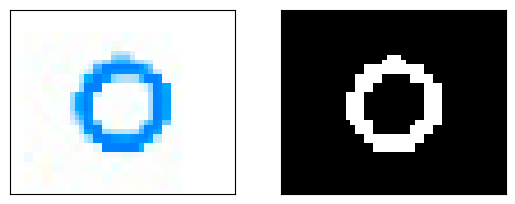

In [10]:
TRESHOLD_VALUE = 190
template_mask = template_tresholding(template_rgb, TRESHOLD_VALUE)

fig = plt.figure()
plt.subplot(1, 2, 1)
draw_image(template_rgb)
plt.xticks([]); plt.yticks([])

plt.subplot(1, 2, 2)
draw_image(template_mask)
plt.xticks([]); plt.yticks([])

In [20]:
template_rgb.shape

(40, 49, 3)

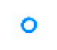

In [25]:
fig = plt.figure(figsize=(0.49, 0.4))
draw_image(template_rgb)
plt.axis("off")

fig.savefig("/mnt/c/Users/admin/Desktop/tmp.png")

# plt.scatter([25], [20], s=16000)

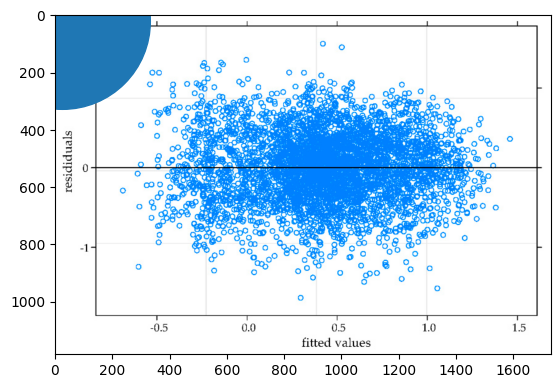

In [19]:
draw_image(source_image)

plt.scatter([25], [20], s=16000)